# Import Packages

In [16]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline  
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from patsy import dmatrices

# Load Data

In [25]:
df=pd.read_csv("loans.csv")

In [26]:
df.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [28]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
credit.policy,9578.0,0.804970,0.396245,0.000000,1.000000,1.000000,1.000000,1.000000e+00
int.rate,9578.0,0.122640,0.026847,0.060000,0.103900,0.122100,0.140700,2.164000e-01
installment,9578.0,319.089413,207.071301,15.670000,163.770000,268.950000,432.762500,9.401400e+02
log.annual.inc,9578.0,10.932117,0.614813,7.547502,10.558414,10.928884,11.291293,1.452835e+01
dti,9578.0,12.606679,6.883970,0.000000,7.212500,12.665000,17.950000,2.996000e+01
fico,9578.0,710.846314,37.970537,612.000000,682.000000,707.000000,737.000000,8.270000e+02
days.with.cr.line,9578.0,4560.767197,2496.930377,178.958333,2820.000000,4139.958333,5730.000000,1.763996e+04
revol.bal,9578.0,16913.963876,33756.189557,0.000000,3187.000000,8596.000000,18249.500000,1.207359e+06
revol.util,9578.0,46.799236,29.014417,0.000000,22.600000,46.300000,70.900000,1.190000e+02
inq.last.6mths,9578.0,1.577469,2.200245,0.000000,0.000000,1.000000,2.000000,3.300000e+01


In [29]:
p=df.purpose
set(p)

{'all_other',
 'credit_card',
 'debt_consolidation',
 'educational',
 'home_improvement',
 'major_purchase',
 'small_business'}

In [30]:
df['purpose'].replace(['all_other',
 'credit_card',
 'debt_consolidation',
 'educational',
 'home_improvement',
 'major_purchase',
 'small_business'],[1,2,3,4,5,6,7],inplace=True)

In [32]:
features=df.drop(['not.fully.paid'],axis=1)

In [33]:
label=df['not.fully.paid']

# spliting data

In [77]:
X_train, X_test, y_train, y_test =train_test_split(features, label, test_size=0.3, random_state=0)

# 1
Using train_test_split function I have splitted the data which was imported from sklearn.model_selection<br>
I have splitted data in 70%  as train and 30% as test data<br>
To predict the accuracy of a model. I have splitted the data.

In [38]:
import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf

In [40]:
fit1_logistic=sm.Logit(y_train, sm.add_constant(X_train)).fit() 
print(fit1_logistic.summary())

Optimization terminated successfully.
         Current function value: 0.414536
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:         not.fully.paid   No. Observations:                 7662
Model:                          Logit   Df Residuals:                     7648
Method:                           MLE   Df Model:                           13
Date:                Tue, 04 Dec 2018   Pseudo R-squ.:                 0.05997
Time:                        16:36:45   Log-Likelihood:                -3176.2
converged:                       True   LL-Null:                       -3378.8
                                        LLR p-value:                 1.718e-78
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 6.9287      1.414      4.901      0.000       4.158       9.700
credit.p

# 2
Above is the solution for question 2

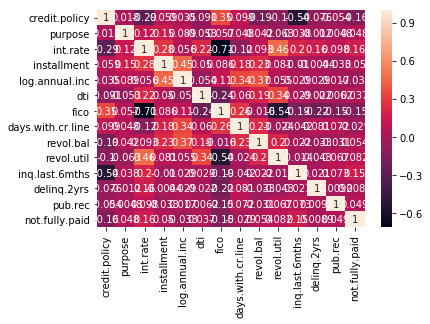

In [35]:
sns.heatmap(df.corr(), annot=True)

In [36]:
df.corr()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
credit.policy,1.000000,0.017569,-0.294089,0.058770,0.034906,-0.090901,0.348319,0.099026,-0.187518,-0.104095,-0.535511,-0.076318,-0.054243,-0.158119
purpose,0.017569,1.000000,0.117067,0.154827,0.088958,-0.053279,0.057337,0.047526,0.042364,-0.062947,0.037516,-0.011701,0.004793,0.047907
int.rate,-0.294089,0.117067,1.000000,0.276140,0.056383,0.220006,-0.714821,-0.124022,0.092527,0.464837,0.202780,0.156079,0.098162,0.159552
installment,0.058770,0.154827,0.276140,1.000000,0.448102,0.050202,0.086039,0.183297,0.233625,0.081356,-0.010419,-0.004368,-0.032760,0.049955
log.annual.inc,0.034906,0.088958,0.056383,0.448102,1.000000,-0.054065,0.114576,0.336896,0.372140,0.054881,0.029171,0.029203,0.016506,-0.033439
dti,-0.090901,-0.053279,0.220006,0.050202,-0.054065,1.000000,-0.241191,0.060101,0.188748,0.337109,0.029189,-0.021792,0.006209,0.037362
fico,0.348319,0.057337,-0.714821,0.086039,0.114576,-0.241191,1.000000,0.263880,-0.015553,-0.541289,-0.185293,-0.216340,-0.147592,-0.149666
days.with.cr.line,0.099026,0.047526,-0.124022,0.183297,0.336896,0.060101,0.263880,1.000000,0.229344,-0.024239,-0.041736,0.081374,0.071826,-0.029237
revol.bal,-0.187518,0.042364,0.092527,0.233625,0.372140,0.188748,-0.015553,0.229344,1.000000,0.203779,0.022394,-0.033243,-0.031010,0.053699
revol.util,-0.104095,-0.062947,0.464837,0.081356,0.054881,0.337109,-0.541289,-0.024239,0.203779,1.000000,-0.013880,-0.042740,0.066717,0.082088


In [41]:
print(fit1_logistic.summary())

                           Logit Regression Results                           
Dep. Variable:         not.fully.paid   No. Observations:                 7662
Model:                          Logit   Df Residuals:                     7648
Method:                           MLE   Df Model:                           13
Date:                Tue, 04 Dec 2018   Pseudo R-squ.:                 0.05997
Time:                        16:37:37   Log-Likelihood:                -3176.2
converged:                       True   LL-Null:                       -3378.8
                                        LLR p-value:                 1.718e-78
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 6.9287      1.414      4.901      0.000       4.158       9.700
credit.policy        -0.3585      0.094     -3.822      0.000      -0.542      -0.175
purpose               0.

# 3
credit.policy, purpose,int.rate,installment,log.annual.inc,fico,revol.bal,inq.last.6mths are significant independent variables.<br>
I have calculated these by p values

# 4
Dummy variables are independent variables which take the value of either 0 or 1<br>
In Logistic Regression, a dummy variable is a numeric stand-in for a qualitative fact or a logical proposition.<br>
If we have Categorical IV than in the new column we will give 1 in place of Categorical IV and remaining will be given to 0.<br>
logit is used to predict the odds of success a case based on the values of the independent variables. 
if we used Y as the outcome variable and tried to fit a line, it wouldn’t be a very good representation of the relationship.<br>
So we used Logit

In [81]:
y_test[y_test==1].count()

468

In [82]:
y_test.shape

(2874,)

In [83]:
prob=(468)/(2874)
prob

0.162839248434238

# 5
The probability of the test set loans not being paid back in full 16%

In [44]:
df.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

In [46]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
pred = logreg.predict(X_test)
print("Score of training data: ", logreg.score(X_train, y_train))
print("Score of testing data: ", logreg.score(X_test, y_test))

Score of training data:  0.8382928739232577
Score of testing data:  0.8413361169102297


C:\Users\SRUJAM\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# 6
For test data  I got score is 84.133%

In [50]:
metrics.confusion_matrix(y_test, pred)

array([[1608,    7],
       [ 297,    4]], dtype=int64)

In [52]:
from sklearn.metrics import classification_report

In [53]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1615
           1       0.36      0.01      0.03       301

   micro avg       0.84      0.84      0.84      1916
   macro avg       0.60      0.50      0.47      1916
weighted avg       0.77      0.84      0.77      1916



In [63]:
specivicity=297/(297+4)
specivicity

0.9867109634551495

In [ ]:
# 7
Sensitivity is the ability of a test to not correctly identify people who have a given disease or disorder<br>
specivity is ability of a test to correctly identify the who have given disease or disease.<br>
presicion is as much a statement about the proportion of actual positives in the population being tested as it is about the test.<br>
presicion is 0.77
sencivity or recall is 0.84
specivicity is 0.98

In [55]:
from sklearn.metrics import accuracy_score

In [57]:
from sklearn.metrics import roc_auc_score

In [58]:
score=accuracy_score(y_test, pred)
roc=roc_auc_score(y_test, pred) 

In [59]:
print("Accuracy score: ", score)
print("roc: ", roc)

Accuracy score:  0.8413361169102297
roc:  0.5044773356098866


In [60]:
def plot_roc_curve(y_test, preds):
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([-0.01, 1.01])
    plt.ylim([-0.01, 1.01])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

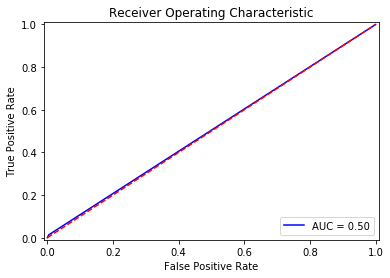

In [61]:
plot_roc_curve(y_test,pred)

# 8
ROC stands for Receiver Operating Characteristic. ROC curves are a nice way to see how any predictive model can distinguish between the true positives and negatives.